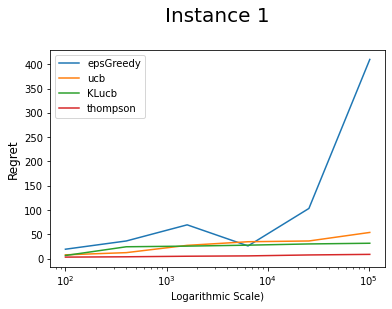

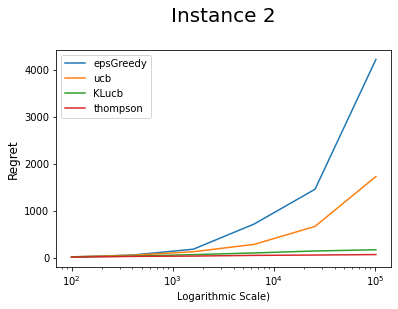

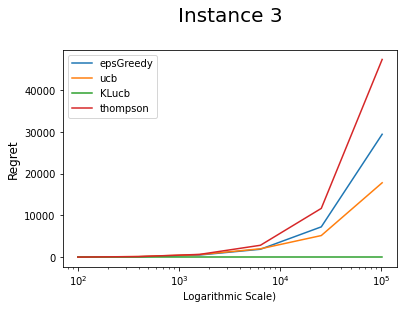

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("outputDataT.txt", header = None, delimiter=", ")
df.columns = ['instance', 'algorithm', 'seed', 'epsilon', 'horizon', 'regret']

data = df.groupby(['instance', 'algorithm', 'horizon']).mean().reset_index()


algos = ['epsGreedy', 'ucb', 'KLucb', 'thompson']
instances = [f"../instances/i-{k}.txt" for k in range(1,4)]

plt.rcParams['figure.figsize'] = 6, 4

for instance in instances:
    plt.xscale("log")
    for algo in algos:
        temp=data[(data.instance==instance) & (data.algorithm==algo)]
        x = list(temp.horizon)
        y = list(temp.regret)
        plt.plot(x,y, label=algo)        
    plt.xlabel("Logarithmic Scale)", fontsize=10)
    plt.ylabel("Regret", fontsize=12)
    plt.title("Instance " + str(instance[-5])+"\n", fontsize=20)
    plt.legend(loc="best")
    plt.show()